In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv(r"C:\Users\patel\Downloads\IMDB_MOVIE_SENTIMENT_PROJECT\Updated_Movies.csv")

In [4]:
df.head()

,Movie_name,Rating,Duration,Release_year,Genre,Director,Num_Reviews,Metascore,Summary
0,1. American Psycho,7.6,1h 42m,2000,drama,Mary Harron,(768K),64.0,A wealthy New York City investment banking exe...
1,2. Battle Royale,7.5,1h 54m,2000,drama,Kinji Fukasaku,(200K),81.0,"In the future, the Japanese government capture..."
2,"3. Crouching Tiger, Hidden Dragon",7.9,2h,2000,drama,Ang Lee,(287K),94.0,A young Chinese warrior steals a sword from a ...
3,5. Frequency,7.4,1h 58m,2000,drama,Gregory Hoblit,(119K),67.0,An accidental cross-time radio link connects f...
4,6. Ginger Snaps,6.8,1h 48m,2000,drama,John Fawcett,(55K),70.0,"Two death-obsessed sisters, outcasts in their ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie_name    2008 non-null   object 
 1   Rating        2008 non-null   float64
 2   Duration      1999 non-null   object 
 3   Release_year  2008 non-null   int64  
 4   Genre         2008 non-null   object 
 5   Director      2008 non-null   object 
 6   Num_Reviews   2008 non-null   object 
 7   Metascore     1699 non-null   float64
 8   Summary       2004 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 141.3+ KB


In [6]:
# checking null valus
df.isna().sum()

Movie_name        0
Rating            0
Duration          9
Release_year      0
Genre             0
Director          0
Num_Reviews       0
Metascore       309
Summary           4
dtype: int64

In [61]:
df.nunique()

Movie_name         832
Rating              42
Duration           114
Release_year        25
Genre               10
Director           568
Num_Reviews        514
Metascore           74
Summary            833
Sentiment_Score    355
dtype: int64

In [7]:
# Converting Movie_name in proper format
df['Movie_name'] = df['Movie_name'].str.replace(r'^\d+\.\s*', '', regex=True)

In [8]:
df

,Movie_name,Rating,Duration,Release_year,Genre,Director,Num_Reviews,Metascore,Summary
0,American Psycho,7.6,1h 42m,2000,drama,Mary Harron,(768K),64.0,A wealthy New York City investment banking exe...
1,Battle Royale,7.5,1h 54m,2000,drama,Kinji Fukasaku,(200K),81.0,"In the future, the Japanese government capture..."
2,"Crouching Tiger, Hidden Dragon",7.9,2h,2000,drama,Ang Lee,(287K),94.0,A young Chinese warrior steals a sword from a ...
3,Frequency,7.4,1h 58m,2000,drama,Gregory Hoblit,(119K),67.0,An accidental cross-time radio link connects f...
4,Ginger Snaps,6.8,1h 48m,2000,drama,John Fawcett,(55K),70.0,"Two death-obsessed sisters, outcasts in their ..."
...,...,...,...,...,...,...,...,...,...
2003,Extraction II,7.0,2h 2m,2023,crime,Sam Hargrave,(161K),57.0,After barely surviving his grievous wounds fro...
2004,House of Sand and Fog,7.5,2h 6m,2003,crime,Vadim Perelman,(74K),71.0,An abandoned wife is evicted from her house an...
2005,Hit Man,6.8,1h 55m,2023,crime,Richard Linklater,(111K),82.0,A professor moonlighting as a hit man of sorts...
2006,Shakhahaari,7.5,2h 25m,2024,crime,Sandeep Sunkad,(1.3K),NaN,Centers on the unexpected intertwining of inno...


In [9]:
# Converting Duration in Minutes
df['Duration'] = df['Duration'].apply(lambda x: int(re.findall(r'(\d+)h', x)[0]) * 60 if isinstance(x, str) and 'h' in x else 0) + \
                   df['Duration'].apply(lambda x: int(re.findall(r'(\d+)m', x)[0]) if isinstance(x, str) and 'm' in x else 0)

In [10]:
# Filling missing values in Duration using Median
df["Duration"].fillna(df["Duration"].median(), inplace=True)

In [11]:
df

,Movie_name,Rating,Duration,Release_year,Genre,Director,Num_Reviews,Metascore,Summary
0,American Psycho,7.6,102,2000,drama,Mary Harron,(768K),64.0,A wealthy New York City investment banking exe...
1,Battle Royale,7.5,114,2000,drama,Kinji Fukasaku,(200K),81.0,"In the future, the Japanese government capture..."
2,"Crouching Tiger, Hidden Dragon",7.9,120,2000,drama,Ang Lee,(287K),94.0,A young Chinese warrior steals a sword from a ...
3,Frequency,7.4,118,2000,drama,Gregory Hoblit,(119K),67.0,An accidental cross-time radio link connects f...
4,Ginger Snaps,6.8,108,2000,drama,John Fawcett,(55K),70.0,"Two death-obsessed sisters, outcasts in their ..."
...,...,...,...,...,...,...,...,...,...
2003,Extraction II,7.0,122,2023,crime,Sam Hargrave,(161K),57.0,After barely surviving his grievous wounds fro...
2004,House of Sand and Fog,7.5,126,2003,crime,Vadim Perelman,(74K),71.0,An abandoned wife is evicted from her house an...
2005,Hit Man,6.8,115,2023,crime,Richard Linklater,(111K),82.0,A professor moonlighting as a hit man of sorts...
2006,Shakhahaari,7.5,145,2024,crime,Sandeep Sunkad,(1.3K),NaN,Centers on the unexpected intertwining of inno...


In [12]:
# Converting num_Reviews in properformat
df['Num_Reviews'] = df['Num_Reviews'].astype(str).str.strip(" ()").apply(lambda x: int(float(x.replace('K', '')) * 1_000) if 'K' in x else 
                                                                            int(float(x.replace('M', '')) * 1_000_000) if 'M' in x else int(x) if x.isdigit() else None)

In [13]:
df

,Movie_name,Rating,Duration,Release_year,Genre,Director,Num_Reviews,Metascore,Summary
0,American Psycho,7.6,102,2000,drama,Mary Harron,768000,64.0,A wealthy New York City investment banking exe...
1,Battle Royale,7.5,114,2000,drama,Kinji Fukasaku,200000,81.0,"In the future, the Japanese government capture..."
2,"Crouching Tiger, Hidden Dragon",7.9,120,2000,drama,Ang Lee,287000,94.0,A young Chinese warrior steals a sword from a ...
3,Frequency,7.4,118,2000,drama,Gregory Hoblit,119000,67.0,An accidental cross-time radio link connects f...
4,Ginger Snaps,6.8,108,2000,drama,John Fawcett,55000,70.0,"Two death-obsessed sisters, outcasts in their ..."
...,...,...,...,...,...,...,...,...,...
2003,Extraction II,7.0,122,2023,crime,Sam Hargrave,161000,57.0,After barely surviving his grievous wounds fro...
2004,House of Sand and Fog,7.5,126,2003,crime,Vadim Perelman,74000,71.0,An abandoned wife is evicted from her house an...
2005,Hit Man,6.8,115,2023,crime,Richard Linklater,111000,82.0,A professor moonlighting as a hit man of sorts...
2006,Shakhahaari,7.5,145,2024,crime,Sandeep Sunkad,1300,NaN,Centers on the unexpected intertwining of inno...


In [14]:
# Filling null values in matascore
df["Metascore"].fillna(df["Metascore"].median(), inplace=True)

In [15]:
df["Summary"].fillna("", inplace=True)

In [16]:
df.isnull().sum()

Movie_name      0
Rating          0
Duration        0
Release_year    0
Genre           0
Director        0
Num_Reviews     0
Metascore       0
Summary         0
dtype: int64

In [17]:
# Changing Data Types
df = df.astype({
    "Duration": "int64",
    "Num_Reviews": "int64",
    "Metascore": "int64"
})

In [18]:
df.describe()

,Rating,Duration,Release_year,Num_Reviews,Metascore
count,2008.000000,2008.000000,2008.000000,2.008000e+03,2008.000000
mean,7.045169,116.703187,2010.117032,3.094961e+05,63.497510
std,0.746856,25.467127,5.846973,3.637703e+05,13.508712
min,4.800000,0.000000,2000.000000,1.300000e+01,19.000000
25%,6.500000,100.000000,2006.000000,6.375000e+04,56.000000
50%,7.100000,113.000000,2009.000000,1.930000e+05,64.000000
75%,7.600000,129.250000,2014.000000,4.380000e+05,72.000000
max,9.000000,242.000000,2024.000000,3.000000e+06,98.000000


# EDA

In [19]:
# Average IMDB Rating
Ave_Rating = df["Rating"].mean()

In [20]:
Ave_Rating

7.045169322709163

In [21]:
# Highest Rated Movie
Highest_rated = df.loc[df["Rating"].idxmax(), "Movie_name"]

In [22]:
Highest_rated

'The Dark Knight'

In [23]:
# Highest Reviewed Movie
Highest_Reviewd = df.loc[df["Num_Reviews"].idxmax(), "Movie_name"]

In [24]:
Highest_Reviewd

'The Dark Knight'

In [25]:
# Average Movie Duration
Avg_Duration  = df["Duration"].mean()

In [26]:
Avg_Duration

116.70318725099601

In [27]:
# Top 10 Movies with Highest Metascore
top_10 = df.nlargest(10, 'Metascore')[['Movie_name', 'Metascore', 'Rating']]

In [28]:
top_10

,Movie_name,Metascore,Rating
100,Pan's Labyrinth,98,8.2
443,Gravity,96,7.7
824,Ratatouille,96,8.1
1049,Ratatouille,96,8.1
1448,Gravity,96,7.7
168,The Hurt Locker,95,7.5
209,The Social Network,95,7.8
373,The Hurt Locker,95,7.5
437,Zero Dark Thirty,95,7.4
1069,WALL·E,95,8.4


In [29]:
# Movies with Rating >= 8.5
top_movies = df[df["Rating"] >= 8.5][['Movie_name', 'Rating', 'Num_Reviews']]

In [30]:
top_movies

,Movie_name,Rating,Num_Reviews
5,Gladiator,8.5,1700000
22,The Lord of the Rings: The Fellowship of the Ring,8.9,2100000
36,The Lord of the Rings: The Two Towers,8.8,1900000
103,The Departed,8.5,1500000
108,The Prestige,8.5,1500000
167,The Dark Knight,9.0,3000000
244,Django Unchained,8.5,1800000
323,The Departed,8.5,1500000
326,The Prestige,8.5,1500000
372,The Dark Knight,9.0,3000000


In [31]:
# Average Rating by Genre
avg_rating_genre = df.groupby('Genre')["Rating"].mean().sort_values(ascending=False)

In [32]:
avg_rating_genre

Genre
drama        7.309200
adventure    7.199462
crime        7.172414
action       7.082000
sci-fi       7.047674
romance      7.047486
comedy       7.035600
thriller     7.002000
mystery      6.902439
horror       6.510494
Name: Rating, dtype: float64

In [33]:
# Most reviewed by Genre
most_reviewed_genre = df.groupby('Genre')["Num_Reviews"].sum().sort_values(ascending=False)

In [34]:
most_reviewed_genre

Genre
action       103145540
adventure     90304500
sci-fi        77851400
thriller      76605859
drama         76075416
comedy        58285728
mystery       44731606
crime         39220085
romance       27807324
horror        27440763
Name: Num_Reviews, dtype: int64

In [35]:
# Average Metascore by Genre
avg_metascore_genre = df.groupby('Genre')["Metascore"].mean().sort_values(ascending=False)

In [36]:
avg_metascore_genre

Genre
adventure    66.279570
drama        65.860000
romance      64.597765
comedy       64.480000
sci-fi       63.593023
crime        63.420690
action       62.064000
mystery      61.914634
thriller     61.760000
horror       60.388889
Name: Metascore, dtype: float64

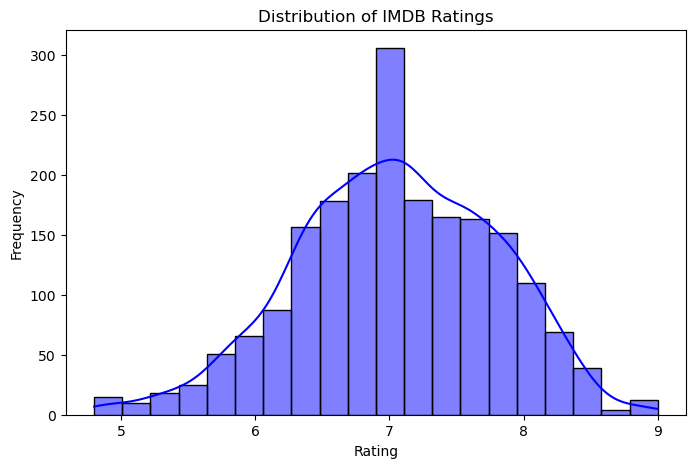

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of IMDB Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

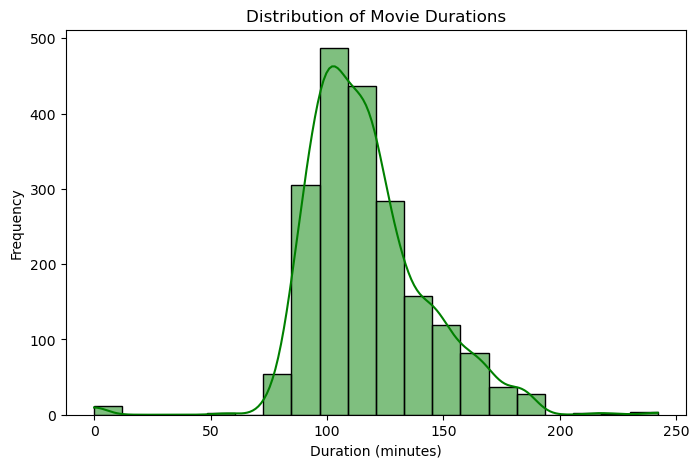

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Duration'], bins=20, kde=True, color='green')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

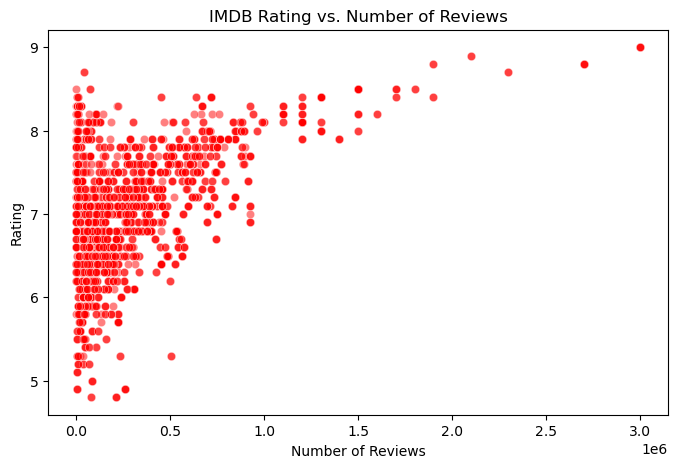

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Num_Reviews'], y=df['Rating'], alpha=0.5, color='red')
plt.title("IMDB Rating vs. Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.show()

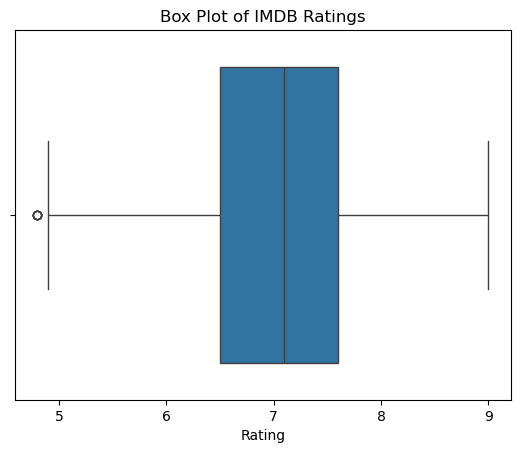

In [40]:
sns.boxplot(x=df['Rating'])
plt.title("Box Plot of IMDB Ratings")
plt.xlabel("Rating")
plt.show()

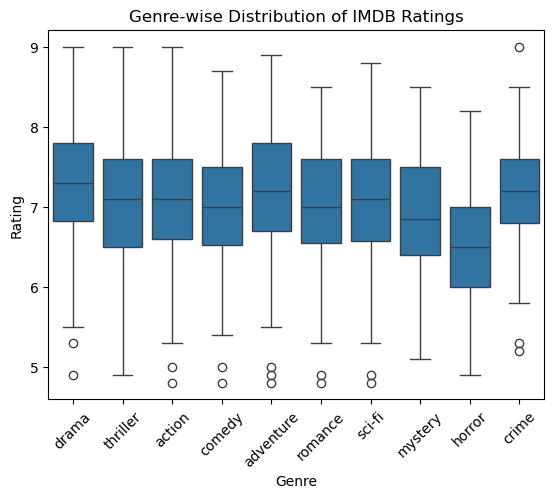

In [41]:
sns.boxplot(x=df['Genre'], y=df['Rating'])
plt.xticks(rotation=45)
plt.title("Genre-wise Distribution of IMDB Ratings")
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.show()

 # Sentiment Analysis

In [42]:
df["Sentiment_Score"] = df["Summary"].apply(lambda x: TextBlob(x).sentiment.polarity if isinstance(x, str) else None)

In [43]:
df

,Movie_name,Rating,Duration,Release_year,Genre,Director,Num_Reviews,Metascore,Summary,Sentiment_Score
0,American Psycho,7.6,102,2000,drama,Mary Harron,768000,64,A wealthy New York City investment banking exe...,-0.040909
1,Battle Royale,7.5,114,2000,drama,Kinji Fukasaku,200000,81,"In the future, the Japanese government capture...",0.000000
2,"Crouching Tiger, Hidden Dragon",7.9,120,2000,drama,Ang Lee,287000,94,A young Chinese warrior steals a sword from a ...,0.025000
3,Frequency,7.4,118,2000,drama,Gregory Hoblit,119000,67,An accidental cross-time radio link connects f...,-0.100000
4,Ginger Snaps,6.8,108,2000,drama,John Fawcett,55000,70,"Two death-obsessed sisters, outcasts in their ...",-0.316667
...,...,...,...,...,...,...,...,...,...,...
2003,Extraction II,7.0,122,2023,crime,Sam Hargrave,161000,57,After barely surviving his grievous wounds fro...,-0.110000
2004,House of Sand and Fog,7.5,126,2003,crime,Vadim Perelman,74000,71,An abandoned wife is evicted from her house an...,-0.306818
2005,Hit Man,6.8,115,2023,crime,Richard Linklater,111000,82,A professor moonlighting as a hit man of sorts...,-0.600000
2006,Shakhahaari,7.5,145,2024,crime,Sandeep Sunkad,1300,64,Centers on the unexpected intertwining of inno...,0.300000


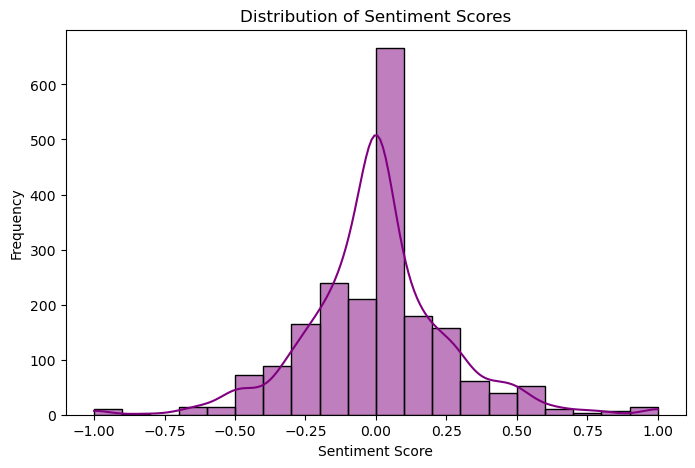

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Sentiment_Score"].dropna(), bins=20, kde=True, color='purple')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

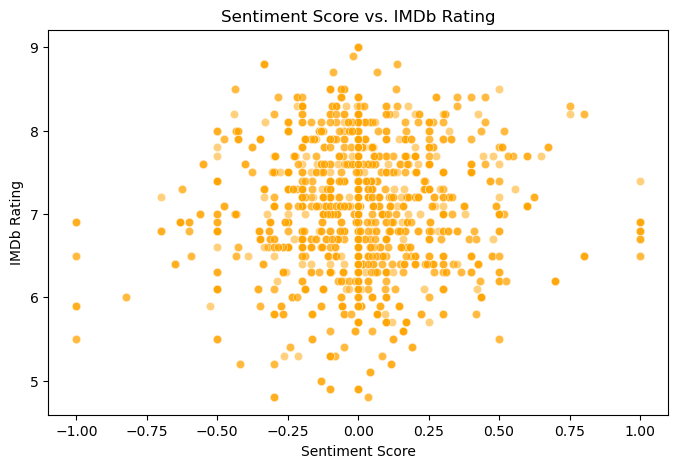

In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Sentiment_Score"], y=df["Rating"], alpha=0.5, color='orange')
plt.title("Sentiment Score vs. IMDb Rating")
plt.xlabel("Sentiment Score")
plt.ylabel("IMDb Rating")
plt.show()

In [46]:
# Movies with Highest Sentiment Scores
top_10_sentiment = df.nlargest(10, "Sentiment_Score")[['Movie_name', 'Sentiment_Score', 'Rating']]

In [47]:
top_10_sentiment

,Movie_name,Sentiment_Score,Rating
294,National Treasure,1.0,6.9
535,National Treasure,1.0,6.9
725,Spies in Disguise,1.0,6.8
726,Pete's Dragon,1.0,6.7
845,Sex Drive,1.0,6.5
978,Spies in Disguise,1.0,6.8
980,Pete's Dragon,1.0,6.7
981,Borat,1.0,7.4
1024,National Treasure,1.0,6.9
1163,Spies in Disguise,1.0,6.8


# Machine Learning - Predicting IMDb Ratings

In [48]:
features = ["Sentiment_Score", "Num_Reviews", "Duration", "Metascore"]
X = df[features]
y = df["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

In [51]:
y_pred

array([6.90760156, 6.08956198, 9.08322153, 6.69571632, 6.5332513 ,
       7.24294577, 6.67886618, 7.92846111, 7.5221513 , 6.75757986,
       6.51895071, 7.97846154, 7.47898184, 7.58464228, 6.15287818,
       7.86186114, 7.14992734, 7.77743258, 7.30024251, 7.62323569,
       7.46482314, 7.47112645, 6.26806365, 6.61058533, 6.40123567,
       7.15113874, 7.00783759, 7.97180655, 8.11510949, 7.2708648 ,
       7.3636501 , 6.91011653, 6.27245921, 6.36629628, 6.11552674,
       6.80171117, 7.1780876 , 7.36785715, 6.61077329, 7.02234795,
       6.99893406, 6.28321133, 7.45526274, 6.94038649, 8.12552226,
       6.4004857 , 7.34528288, 7.34630895, 5.95922616, 6.9018204 ,
       6.73450507, 6.73561792, 6.97557887, 7.25029915, 7.00055426,
       6.57563285, 6.48449023, 6.90702184, 7.21594298, 7.30269636,
       7.862475  , 6.79332624, 7.1780876 , 7.63719459, 7.32711332,
       6.63909342, 7.04901279, 6.68885742, 7.1619232 , 7.08641241,
       7.10636387, 6.9972813 , 6.27802862, 7.45216812, 6.75777

In [52]:
mse = mean_squared_error(y_test, y_pred)

In [53]:
mse

0.25681789945785977

In [54]:
r2 = r2_score(y_test, y_pred)

In [55]:
r2

0.5274915361342356

In [56]:
df.to_csv('Cleaned_Updated_Movies.csv',index = False)